**Pima Indians Diabetes Database**

In this example, I first load the Pima Indian Dataset and I then train a Multi Layer Perceptron using Tensorflow Eager Execution (executes operations immediately, without building graphs: operations return concrete values instead of constructing a computational graph to run later). Finally I will save the trained model and deploy it dirently online to make predictions.

**Preprocessing**

In [1]:
import tensorflowjs as tfjs
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
print(tf.__version__)

1.14.0


In [3]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("pima_indian_data.csv")
#df = df.drop('Unnamed: 0', axis=1)
df.head()
# print(df.shape)
# print(df.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#df.to_csv("pima.csv", index=False)

**Data Visualization**

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

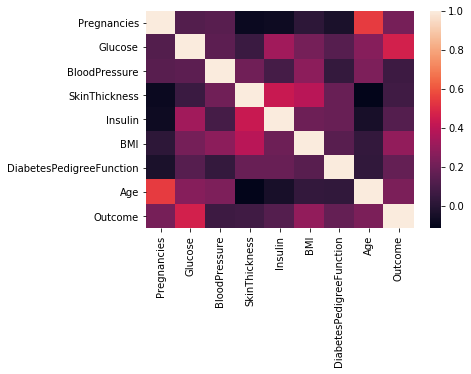

In [6]:
import seaborn as sns

corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

**Deep Learning**

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'], axis = 1).values
Y = df['Outcome']

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
# Initialize the constructor
model = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation='relu', input_shape=(8,)),  # must declare input shape
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='relu')
])
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 2,061
Trainable params: 2,061
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_Train, Y_Train,epochs=150, batch_size=256)

W0804 20:04:34.299620 15224 deprecation.py:323] From C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/150
537/537 [==============================] - 0s 373us/sample - loss: 2.5760 - acc: 0.6518
Epoch 2/150
537/537 [==============================] - 0s 15us/sample - loss: 1.5932 - acc: 0.6462
Epoch 3/150
537/537 [==============================] - 0s 17us/sample - loss: 1.0557 - acc: 0.6499
Epoch 4/150
537/537 [==============================] - 0s 28us/sample - loss: 0.8348 - acc: 0.6462
Epoch 5/150
537/537 [==============================] - 0s 20us/sample - loss: 0.7185 - acc: 0.6406
Epoch 6/150
537/537 [==============================] - 0s 13us/sample - loss: 0.6872 - acc: 0.6425
Epoch 7/150
537/537 [==============================] - 0s 20us/sample - loss: 0.6711 - acc: 0.6425
Epoch 8/150
537/537 [==============================] - 0s 19us/sample - loss: 0.6604 - acc: 0.6443
Epoch 9/150
537/537 [==============================] - 0s 17us/sample - loss: 0.6424 - acc: 0.6480
Epoch 10/150
537/537 [==============================] - 0s 15us/sample - loss: 0.6321 - acc: 0.6443
Epoch 11

537/537 [==============================] - 0s 19us/sample - loss: 0.4292 - acc: 0.7896
Epoch 83/150
537/537 [==============================] - 0s 11us/sample - loss: 0.4250 - acc: 0.7952
Epoch 84/150
537/537 [==============================] - 0s 22us/sample - loss: 0.4214 - acc: 0.7933
Epoch 85/150
537/537 [==============================] - 0s 17us/sample - loss: 0.4203 - acc: 0.7914
Epoch 86/150
537/537 [==============================] - 0s 17us/sample - loss: 0.4205 - acc: 0.7933
Epoch 87/150
537/537 [==============================] - 0s 20us/sample - loss: 0.4197 - acc: 0.7858
Epoch 88/150
537/537 [==============================] - 0s 15us/sample - loss: 0.4183 - acc: 0.7821
Epoch 89/150
537/537 [==============================] - 0s 19us/sample - loss: 0.4172 - acc: 0.7840
Epoch 90/150
537/537 [==============================] - 0s 19us/sample - loss: 0.4155 - acc: 0.7877
Epoch 91/150
537/537 [==============================] - 0s 19us/sample - loss: 0.4141 - acc: 0.8007
Epoch 92/150


In [11]:
# over the training set
y_pred=model.predict_classes(X_Train)
print(confusion_matrix(Y_Train, y_pred))
print(classification_report(Y_Train, y_pred))

[[317  33]
 [ 62 125]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       350
           1       0.79      0.67      0.72       187

   micro avg       0.82      0.82      0.82       537
   macro avg       0.81      0.79      0.80       537
weighted avg       0.82      0.82      0.82       537



In [12]:
# over the test set
y_pred=model.predict_classes(X_Test)
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

[[127  23]
 [ 32  49]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       150
           1       0.68      0.60      0.64        81

   micro avg       0.76      0.76      0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



In [13]:
tfjs.converters.save_keras_model(model, 'modelready')